In [76]:
import pandas as pd
import numpy as np

data = pd.read_csv('./weekly_cases.csv')

In [77]:
data

,date,World,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,...,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,Yemen,Zambia,Zimbabwe
0,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,2024-07-31,56016.0,0.0,134.0,0.0,6.0,0.0,0.0,0.0,0.0,...,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,0.0
1670,2024-08-01,56016.0,0.0,134.0,0.0,6.0,0.0,0.0,0.0,0.0,...,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,0.0
1671,2024-08-02,56016.0,0.0,134.0,0.0,6.0,0.0,0.0,0.0,0.0,...,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,0.0
1672,2024-08-03,56016.0,0.0,134.0,0.0,6.0,0.0,0.0,0.0,0.0,...,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,0.0


In [78]:
US_data = data[['date','United States']]

In [79]:
US_data  

,date,United States
0,2020-01-05,NaN
1,2020-01-06,NaN
2,2020-01-07,NaN
3,2020-01-08,NaN
4,2020-01-09,NaN
...,...,...
1669,2024-07-31,NaN
1670,2024-08-01,NaN
1671,2024-08-02,NaN
1672,2024-08-03,NaN


In [80]:
# US_2020 = US_data[0:362]
# US_2021 = US_data[362:727]
# US_2022 = US_data[727:1092]

In [81]:
# US_2022

/var/folders/d9/sm63sd5x60ld_kb4fb2pm3zc0000gn/T/ipykernel_7484/1995370471.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_data["date"] = pd.to_datetime(US_data["date"])


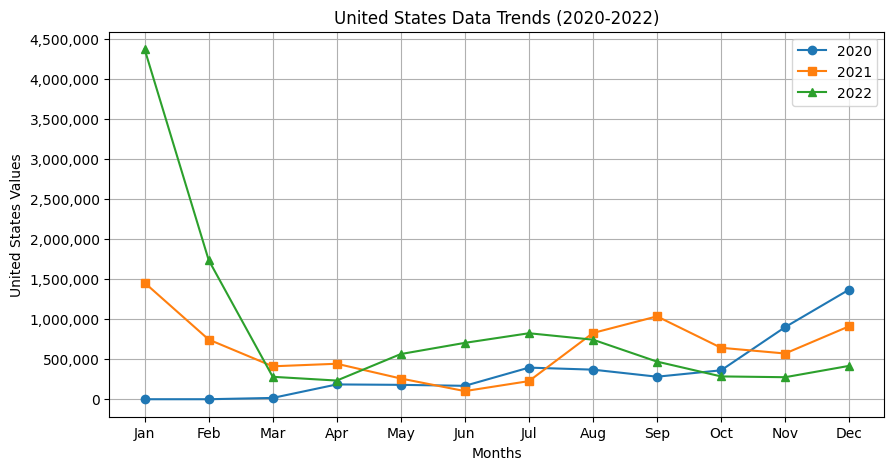

In [82]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as mticker

# Ensure the date column is in datetime format
US_data["date"] = pd.to_datetime(US_data["date"])

# Extract data for each year
US_2020 = US_data.iloc[0:362]
US_2021 = US_data.iloc[362:727]
US_2022 = US_data.iloc[727:1092]

# Group data by month (taking monthly averages)
US_2020_monthly = US_2020.groupby(US_2020["date"].dt.month)["United States"].mean()
US_2021_monthly = US_2021.groupby(US_2021["date"].dt.month)["United States"].mean()
US_2022_monthly = US_2022.groupby(US_2022["date"].dt.month)["United States"].mean()

# Generate x-axis labels (January to December)
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(months, US_2020_monthly, marker='o', label="2020")
plt.plot(months, US_2021_monthly, marker='s', label="2021")
plt.plot(months, US_2022_monthly, marker='^', label="2022")

plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter("{x:,.0f}"))
plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(500000)) 

# Labels and title
plt.xlabel("Months")
plt.ylabel("United States Values")
plt.title("United States Data Trends (2020-2022)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [83]:
first_2020 = US_2020.sort_values("date").groupby(US_2020["date"].dt.month).first()
first_2021 = US_2021.sort_values("date").groupby(US_2021["date"].dt.month).first()
first_2022 = US_2022.sort_values("date").groupby(US_2022["date"].dt.month).first()

first_2022

,date,United States
date,,
1,2022-01-01,1417419.0
2,2022-02-01,3789262.0
3,2022-03-01,458272.0
4,2022-04-01,193469.0
5,2022-05-01,378549.0
6,2022-06-01,740720.0
7,2022-07-01,709637.0
8,2022-08-01,947983.0
9,2022-09-01,610329.0


/var/folders/d9/sm63sd5x60ld_kb4fb2pm3zc0000gn/T/ipykernel_7484/3718743365.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_data["date"] = pd.to_datetime(US_data["date"])


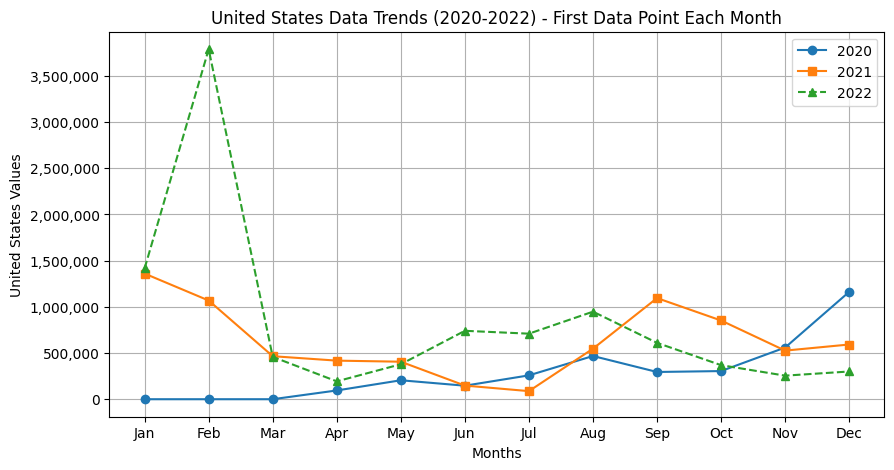

In [86]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as mticker

# Ensure the date column is in datetime format
US_data["date"] = pd.to_datetime(US_data["date"])

# Extract first entry for each month
first_2020 = US_2020.sort_values("date").groupby(US_2020["date"].dt.month).first()["United States"]
first_2021 = US_2021.sort_values("date").groupby(US_2021["date"].dt.month).first()["United States"]
first_2022 = US_2022.sort_values("date").groupby(US_2022["date"].dt.month).first()["United States"]

# Generate x-axis labels (January to December)
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Plot the data (only first data point for each month)
plt.figure(figsize=(10, 5))
plt.plot(months, first_2020, marker='o', linestyle='-', label="2020")
plt.plot(months, first_2021, marker='s', linestyle='-', label="2021")
plt.plot(months, first_2022, marker='^', linestyle='dashed', label="2022")

# Format y-axis
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter("{x:,.0f}"))  # No scientific notation
plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(500000))  # Show every 500,000

# Labels and title
plt.xlabel("Months")
plt.ylabel("United States Values")
plt.title("United States Data Trends (2020-2022) - First Data Point Each Month")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
